# **Loan Approval Prediction Model**

## **Problem Statement**
 Develop a machine learning model to predict **loan approval** status based on applicant features. The model will be trained on a dataset containing loan applications and their outcomes. It will help financial institutions automate and improve the accuracy of loan approval decisions.

## **Objective:**  
To predict **Loan Approval Status** using a Machine Learning Model. 

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
# Load the Dataset                                                                                                                   
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Getting shape of dataset
df.shape

(4269, 13)

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [6]:
# Statistical summary of numerical columns
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
# Checking for Duplicate values
df.duplicated().sum()

0

In [8]:
# Dropping rows with null values
df.dropna(inplace=True)

In [9]:
#Removing Blank spaces from column names and values

df.columns = df.columns.str.strip()

df['loan_status'] = df['loan_status'].str.strip()  # Remove spaces

df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [10]:
# Data Transformation on Education, Self Employed Coloumns

df['education'] = df['education'].replace({'Not Graduate': 0, 'Graduate': 1})

df['self_employed'] = df['self_employed'].replace({'No': 0, 'Yes': 1})

In [11]:
# Data Transformation on Loan Status Coloumns

df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [12]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## Exploratory Data Analysis 

### 1. Univariate Analysis

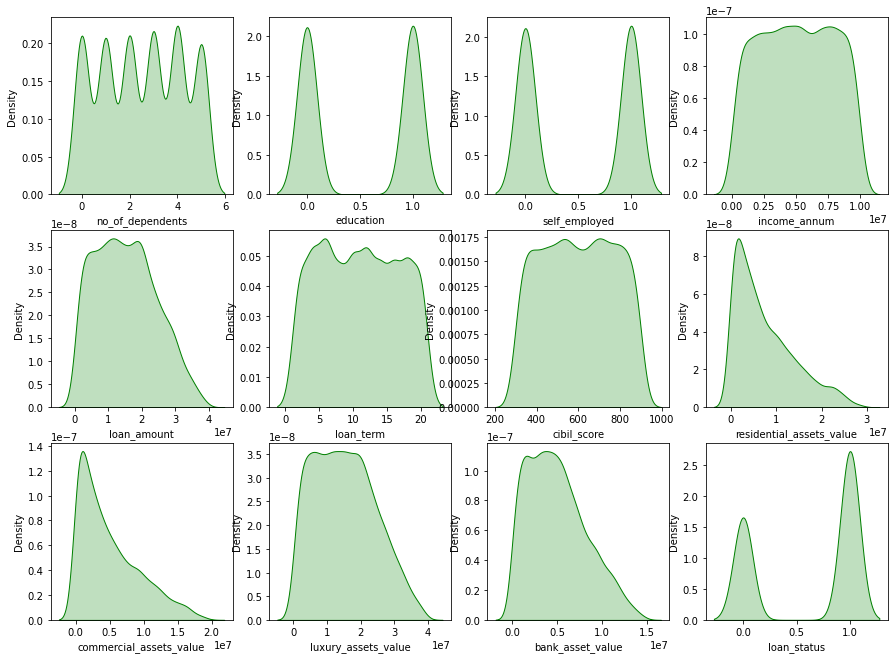

In [13]:
# Univariate analysis
plt.figure(figsize=(15, 15))

numerical_columns = ['no_of_dependents', 'education', 'self_employed', 
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value', 
    'luxury_assets_value', 'bank_asset_value', 'loan_status']

for i in range(len(numerical_columns)):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(x=df[numerical_columns[i]], fill=True, color='green')  # Replaced shade with fill
    plt.xlabel(numerical_columns[i])

plt.show()

In [14]:
print(df.columns)  # List all column names

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


### 2. Bivariate and Multivariate Analysis

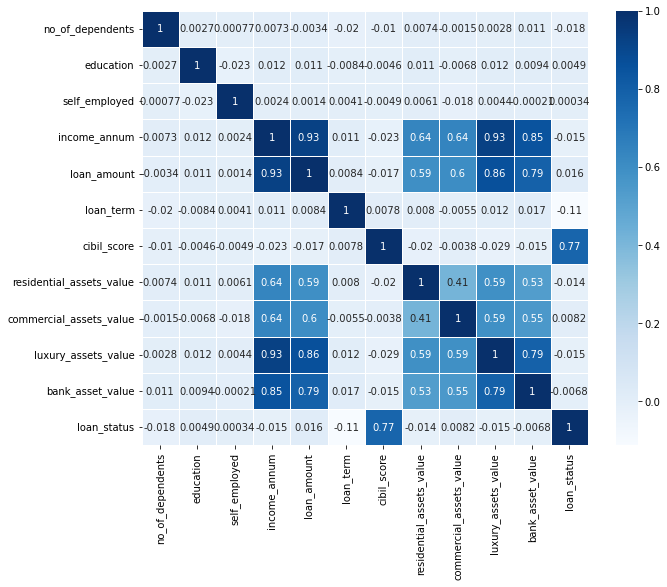

In [15]:
# Bi and Multi Variate Analysis

# Creating correlation heatmap

plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='Blues', linewidths=0.5)

plt.show()

## Model Selection & Training:

In [16]:
#Adding all asset cols into one col.

df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']

In [17]:
#Dropping non required columns

df.drop(columns=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], inplace=True)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets
0,1,2,1,0,9600000,29900000,12,778,1,50700000
1,2,0,0,1,4100000,12200000,8,417,0,17000000
2,3,3,1,0,9100000,29700000,20,506,0,57700000
3,4,3,1,0,8200000,30700000,8,467,0,52700000
4,5,5,0,1,9800000,24200000,20,382,0,55000000


In [18]:
# Dropping the unwanted columns(Less Required Cols)
df.drop(columns=['loan_id', 'no_of_dependents', 'education', 'self_employed'], inplace=True)

#Removing Target Variable and creating the feature matrix `x`, which will be used for training the model.
x = df.drop(columns=['loan_status'])

# Creating the Target matrix `y`, which contains target variable
y = df['loan_status']

### **Features (X) and Target (y) in Supervised Learning**  

- **Features (X):** Input variables used to predict the target. Examples:  
  - **CIBIL Score**  
  - **Loan Amount**  
  - **Total Assets**  
  - **Loan Term**  
  - **Income Annum**  

- **Target (y):** The output variable we want to predict, i.e., **Loan Approval Status (Approved/Not Approved)**. 

### Split data into training and testing sets.

In [19]:
# Divide the dataset into training (80%) and testing (20%) subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Train the Regression Model

In [20]:
# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model using the training dataset
model.fit(x_train, y_train)

# Generate predictions on the test dataset
y_pred = model.predict(x_test)

# Display the first 10 predicted values
print('Predictions',y_pred[:10])

Predictions [0 1 0 1 1 1 1 0 1 0]


In [21]:
#Getting Model Accuracy

print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.905152224824356
